In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

loaad dataset

In [2]:
historic_data = pd.read_csv('/content/historic.csv')

'item_no': Since 'item_no' has high variance and all values are unique, it doesn't provide useful information for prediction and can be dropped.

'Category': There are 6 categories of products: Tunic, Polo-Shirt, T-Shirt, Sweatshirt, Blouse, and Hoodie. We need to convert this categorical feature into numerical values during feature engineering.

'main_promotion': Main promotion methods include Category_Highlight, Catalog, Frontpage_Header, and Display_Ad_Campaign. This categorical feature also needs to be encoded into numerical values.

'Color': Products come in 10 various colors, represented by labels such as 'Red', 'Blue', 'Green', etc. This feature also requires encoding into numerical values.

'Success_Indicator': The success indicators are labeled as 'TOP' and 'FLOP', with counts of 5185 for 'TOP' and 2815 for 'FLOP'. Since the data is imbalanced, 'Success_Indicator' will be our target feature for binary classification. Suitable models include logistic regression, SVM classifier, decision trees, and ensemble models.

In [3]:
print(historic_data.head())

   item_no    category      main_promotion  color  stars success_indicator
0   739157       Tunic             Catalog  Green    3.1              flop
1   591846      Hoodie  Category_Highlight    Red    1.5              flop
2   337574  Sweatshirt             Catalog    Red    4.4               top
3   401933  Polo-Shirt  Category_Highlight   Blue    3.1              flop
4   812151      Hoodie  Category_Highlight  Green    4.1               top


In [4]:
historic_data.drop(['item_no'], axis=1, inplace=True)

In [5]:
print(historic_data.describe())

             stars
count  8000.000000
mean      3.473075
std       0.978810
min       0.300000
25%       2.800000
50%       3.500000
75%       4.200000
max       6.100000


distribution categories

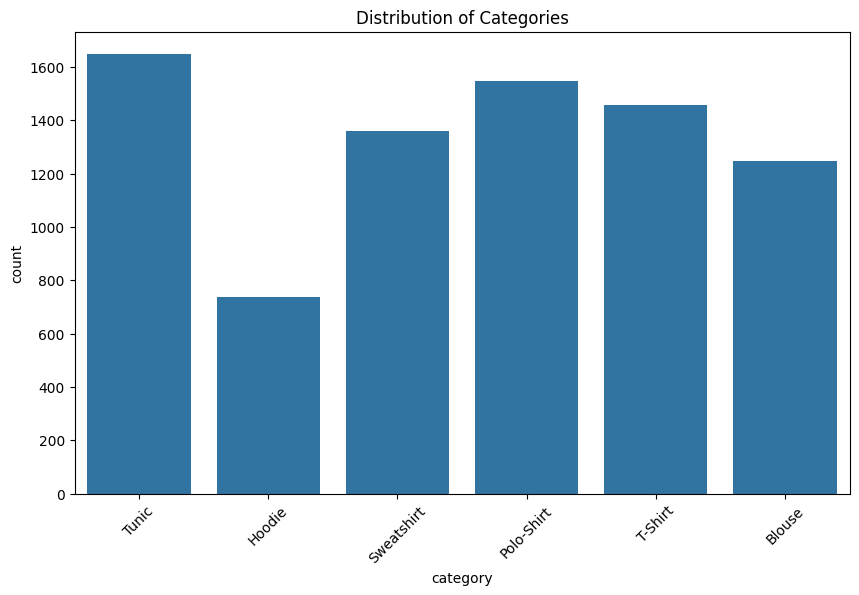

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=historic_data)
plt.title('Distribution of Categories')
plt.xticks(rotation=45)
plt.show()

distribution of main promotion

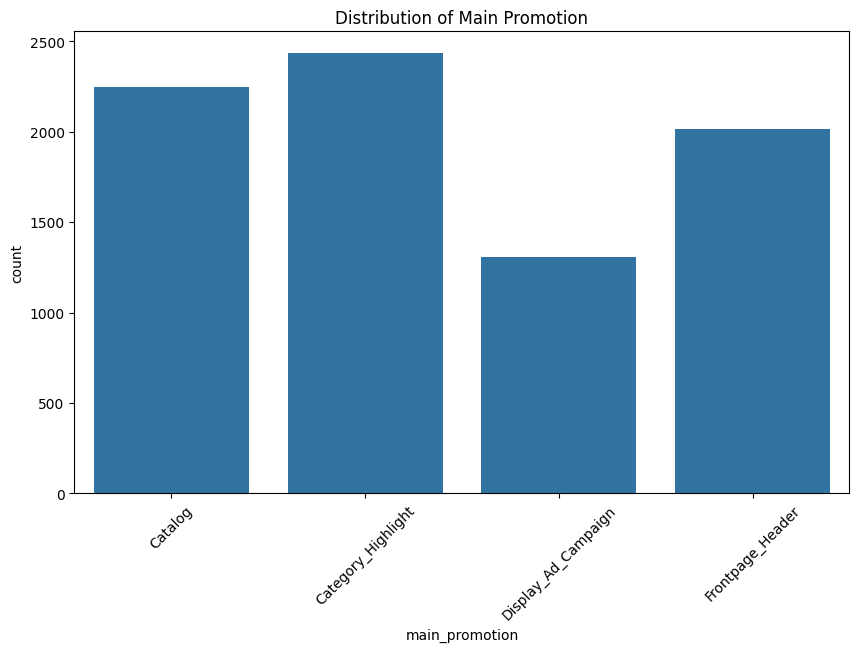

In [8]:
# Distribution of main_promotion
plt.figure(figsize=(10, 6))
sns.countplot(x='main_promotion', data=historic_data)
plt.title('Distribution of Main Promotion')
plt.xticks(rotation=45)
plt.show()

distribution by colour

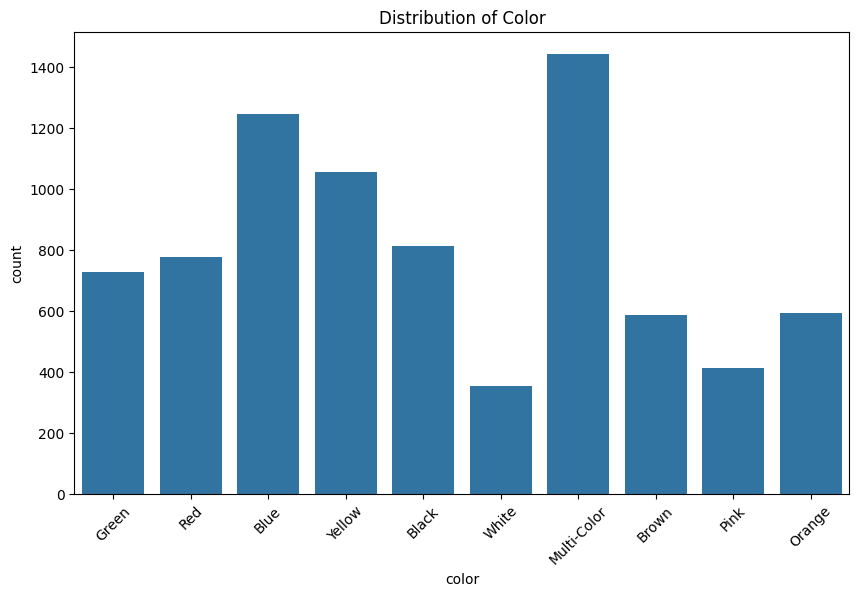

In [9]:
# Distribution of color
plt.figure(figsize=(10, 6))
sns.countplot(x='color', data=historic_data)
plt.title('Distribution of Color')
plt.xticks(rotation=45)
plt.show()

distribution by stars

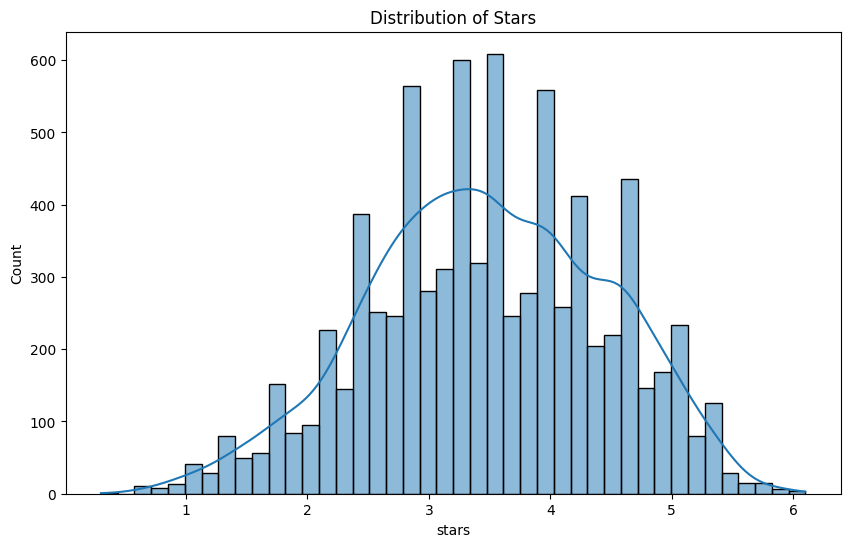

In [10]:
# Distribution of stars
plt.figure(figsize=(10, 6))
sns.histplot(data=historic_data, x='stars', kde=True)
plt.title('Distribution of Stars')
plt.show()

dist of categories with success indicator

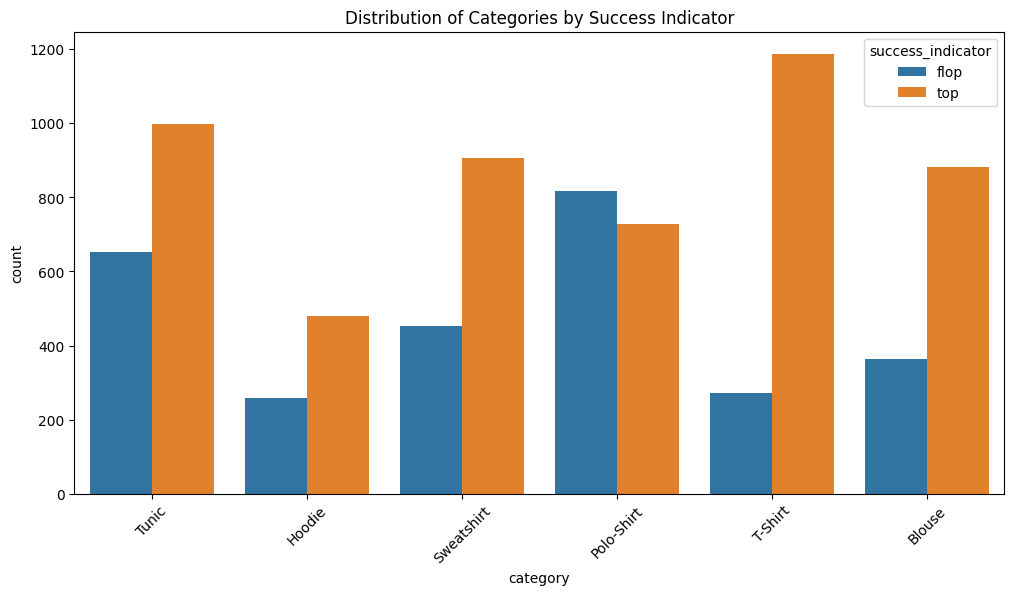

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='success_indicator', data=historic_data)
plt.title('Distribution of Categories by Success Indicator')
plt.xticks(rotation=45)
plt.show()

distribution by main promotion with success indicator

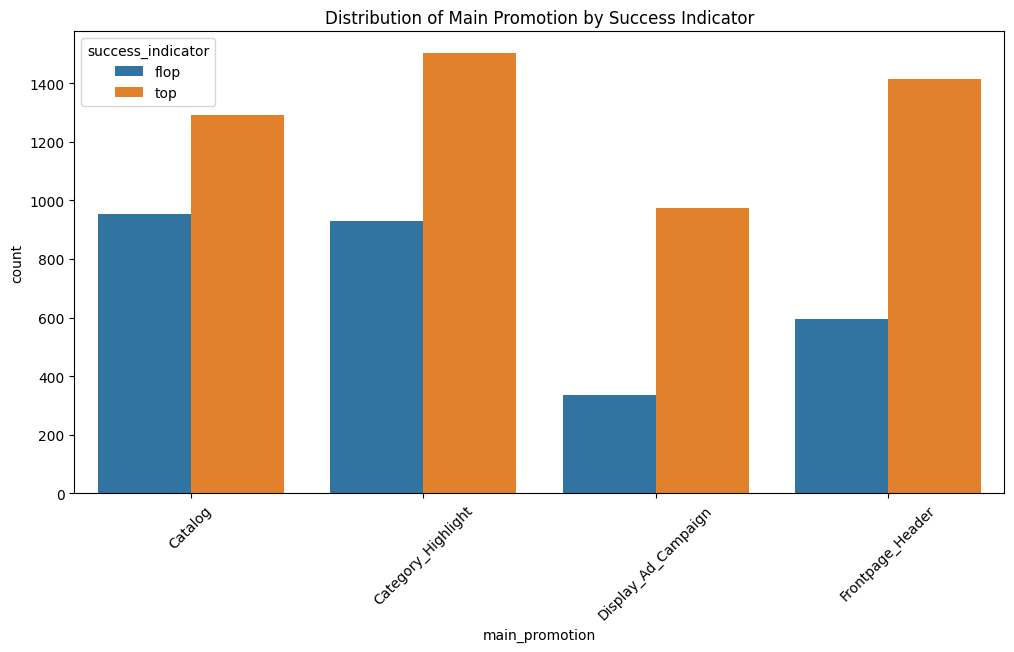

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='main_promotion', hue='success_indicator', data=historic_data)
plt.title('Distribution of Main Promotion by Success Indicator')
plt.xticks(rotation=45)
plt.show()

word cloud of categories with success indicators

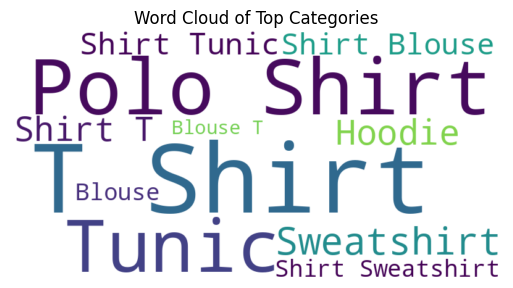

In [14]:
from wordcloud import WordCloud

# Concatenate categories for top and flop products separately
categories_top = ' '.join(historic_data[historic_data['success_indicator'] == 'top']['category'])
categories_flop = ' '.join(historic_data[historic_data['success_indicator'] == 'flop']['category'])

# Generate word clouds for top and flop categories
wordcloud_top = WordCloud(width=800, height=400, background_color='white').generate(categories_top)

# Plot word cloudssucess
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_top, interpolation='bilinear')
plt.title('Word Cloud of Top Categories')
plt.axis('off')

plt.show()


In [16]:
historic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           8000 non-null   object 
 1   main_promotion     8000 non-null   object 
 2   color              8000 non-null   object 
 3   stars              8000 non-null   float64
 4   success_indicator  8000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 312.6+ KB


analysis on stars

In [24]:
historic_data['stars'] = historic_data['stars'].astype(float)

In [25]:
historic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           8000 non-null   object 
 1   main_promotion     8000 non-null   object 
 2   color              8000 non-null   object 
 3   stars              8000 non-null   float64
 4   success_indicator  8000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 312.6+ KB


In [29]:
historic_data['stars'] = np.where(historic_data['stars'] <= 3, 0, historic_data['stars'])
#BIN 1st where star <=3 will assign them as 0 as most of them are 'FLOP'

In [31]:
historic_data['stars'] = np.where(historic_data['stars'] > 3, 1, historic_data['stars'])

In [32]:
historic_data['stars'].value_counts()

1.0    5278
0.0    2722
Name: stars, dtype: int64

In [34]:
historic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           8000 non-null   object 
 1   main_promotion     8000 non-null   object 
 2   color              8000 non-null   object 
 3   stars              8000 non-null   float64
 4   success_indicator  8000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 312.6+ KB


success indicator

In [35]:
historic_data['success_indicator'].value_counts()

top     5185
flop    2815
Name: success_indicator, dtype: int64

In [36]:
(2815/8000)*100   # flop %

35.1875

In [37]:
(5185/8000)*100   #top%

64.8125

In [40]:
from imblearn.over_sampling import SMOTE
x = historic_data.drop('success_indicator', axis=1)
y = historic_data['success_indicator']

distribution of success indicators

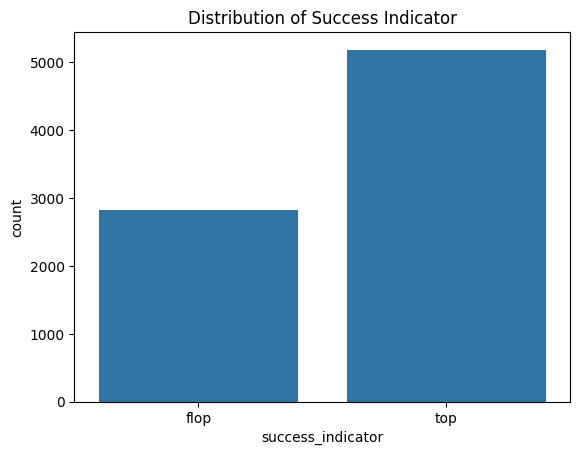

In [43]:
sns.countplot(x='success_indicator', data=historic_data)
plt.title('Distribution of Success Indicator')
plt.show()

distribution by color with success indicator

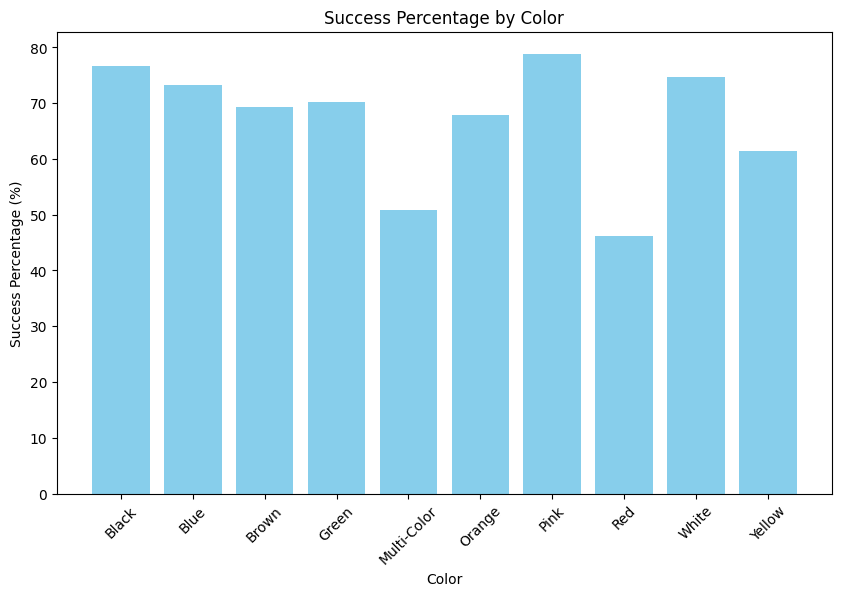

In [45]:
color_success_percentage = historic_data.groupby(['color', 'success_indicator']).size().unstack(fill_value=0)
color_success_percentage['total'] = color_success_percentage['flop'] + color_success_percentage['top']
color_success_percentage['success_percentage'] = (color_success_percentage['top'] / color_success_percentage['total']) * 100
color_success_percentage.reset_index(inplace=True)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(color_success_percentage['color'], color_success_percentage['success_percentage'], color='skyblue')
plt.xlabel('Color')
plt.ylabel('Success Percentage (%)')
plt.title('Success Percentage by Color')
plt.xticks(rotation=45)
plt.show()


insight:

Relationship between 'item_no' and 'Success_Indicator': There is no relation between 'item_no' and 'Success_Indicator' as 'item_no' is with high varience of data in it and hence we can look ahead of dropping it.


Relationship between 'color' and 'Success_Indicator': when product color is Black then percent of sucess indicator = TOP will be 76.72% when product color is Blue then percent of sucess indicator = TOP will be 73.31% when product color is Green then percent of sucess indicator = TOP will be 70.19% when product color is Multi-Color then percent of sucess indicator = TOP will be 50.93% when product color is Orange then percent of sucess indicator = TOP will be 67.90% when product color is Pink then percent of sucess indicator = TOP will be 78.88% when product color is red then percent of sucess indicator = TOP will be 46.26% when product color is White then percent of sucess indicator = TOP will be 74.71% when product color is Yellow then percent of sucess indicator = TOP will be 61.45% Hence as per this analysis launching product with pink, black and white will be good for buisness.


the percentage of flop items is less compared to top.
the data is not balanced it is biased towards top products.
